In [142]:
import pandas as pd
import sqlalchemy as sa
import requests
import json
import sqlalchemy
import nest_asyncio
from requests_html import AsyncHTMLSession
import aiohttp
import os
from bs4 import BeautifulSoup


## CURRENT WEATHER API

In [143]:
appid = '0ee1aeec809c143ac777fe7340414f60'
lat=43.6548
lon= -79.3883
units= 'metric'
limit = 10000
offset = 0

current_weather_api_url = 'https://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&units={}&appid={}&limit={}&offset={}'.format(lat, lon, units, appid, limit, offset)

print(current_weather_api_url)

https://api.openweathermap.org/data/2.5/weather?lat=43.6548&lon=-79.3883&units=metric&appid=0ee1aeec809c143ac777fe7340414f60&limit=10000&offset=0


In [144]:
api_response = requests.get(current_weather_api_url)

api_response

<Response [200]>

In [145]:
data = api_response.json()
data

{'coord': {'lon': -79.3883, 'lat': 43.6548},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 20.81,
  'feels_like': 20.88,
  'temp_min': 19.31,
  'temp_max': 21.89,
  'pressure': 1015,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 5.14, 'deg': 340},
 'clouds': {'all': 75},
 'dt': 1691977610,
 'sys': {'type': 1,
  'id': 718,
  'country': 'CA',
  'sunrise': 1691921980,
  'sunset': 1691972726},
 'timezone': -14400,
 'id': 6167863,
 'name': 'Downtown Toronto',
 'cod': 200}

In [146]:
from datetime import datetime

In [147]:
data_list = []

dt = pd.to_datetime(data['dt'], unit='s')
sys_sunrise = pd.to_datetime(data['sys']['sunrise'], unit='s')
sys_sunset = pd.to_datetime(data['sys']['sunset'], unit='s')

data_dict = {
    'timezone': data['timezone'],
    'id': data['id'],
    'name': data['name'],
    'coord_lon': data['coord']['lon'],
    'coord_lat': data['coord']['lat'],
    'cod': data['cod'],
    'weather_main': data['weather'][0]['main'],
    'weather_description': data['weather'][0]['description'],
    'weather_icon': data['weather'][0]['icon'],
    'base': data['base'],
    'main_temp': data['main']['temp'],
    'main_feels_like': data['main']['feels_like'],
    'main_temp_min': data['main']['temp_min'],
    'main_temp_max': data['main']['temp_max'],
    'main_pressure': data['main']['pressure'],
    'main_humidity': data['main']['humidity'],
    'visibility': data['visibility'],
    'wind_speed': data['wind']['speed'],
    'wind_deg': data['wind']['deg'],
    'clouds_all': data['clouds']['all'],
    'dt': dt,
    'sys_id': data['sys']['id'],
    'sys_country': data['sys']['country'],
    'sys_sunrise': sys_sunrise,
    'sys_sunset': sys_sunset
}

data_list.append(data_dict)

df = pd.DataFrame(data_list)

print(df)

   timezone       id              name  coord_lon  coord_lat  cod   
0    -14400  6167863  Downtown Toronto   -79.3883    43.6548  200  \

  weather_main weather_description weather_icon      base  ...  main_humidity   
0       Clouds       broken clouds          04n  stations  ...             74  \

   visibility  wind_speed  wind_deg  clouds_all                  dt  sys_id   
0       10000        5.14       340          75 2023-08-14 01:46:50     718  \

   sys_country         sys_sunrise          sys_sunset  
0           CA 2023-08-13 10:19:40 2023-08-14 00:25:26  

[1 rows x 25 columns]


In [148]:
current_weather = pd.DataFrame(df)

print(current_weather)

   timezone       id              name  coord_lon  coord_lat  cod   
0    -14400  6167863  Downtown Toronto   -79.3883    43.6548  200  \

  weather_main weather_description weather_icon      base  ...  main_humidity   
0       Clouds       broken clouds          04n  stations  ...             74  \

   visibility  wind_speed  wind_deg  clouds_all                  dt  sys_id   
0       10000        5.14       340          75 2023-08-14 01:46:50     718  \

   sys_country         sys_sunrise          sys_sunset  
0           CA 2023-08-13 10:19:40 2023-08-14 00:25:26  

[1 rows x 25 columns]


In [250]:
db_secret = {
    'drivername' : 'postgresql+psycopg2',
    'host'      : 'mmai5100postgres.canadacentral.cloudapp.azure.com',
    'port'      : '5432',
    'username'  : 'rbaid',
    'password'  : '2023!Schulich',
    'database'  : 'rbaid_db'
}

In [251]:
db_connection_url = sa.engine.URL.create(
    drivername = db_secret['drivername'],
    username   = db_secret['username'],
    password   = db_secret['password'],
    host       = db_secret['host'],
    port       = db_secret['port'],
    database   = db_secret['database']
)

In [252]:
engine = sa.create_engine(db_connection_url)

In [153]:
current_weather

,timezone,id,name,coord_lon,coord_lat,cod,weather_main,weather_description,weather_icon,base,...,main_humidity,visibility,wind_speed,wind_deg,clouds_all,dt,sys_id,sys_country,sys_sunrise,sys_sunset
0,-14400,6167863,Downtown Toronto,-79.3883,43.6548,200,Clouds,broken clouds,04n,stations,...,74,10000,5.14,340,75,2023-08-14 01:46:50,718,CA,2023-08-13 10:19:40,2023-08-14 00:25:26


In [154]:
current_weather.dtypes

timezone                        int64
id                              int64
name                           object
coord_lon                     float64
coord_lat                     float64
cod                             int64
weather_main                   object
weather_description            object
weather_icon                   object
base                           object
main_temp                     float64
main_feels_like               float64
main_temp_min                 float64
main_temp_max                 float64
main_pressure                   int64
main_humidity                   int64
visibility                      int64
wind_speed                    float64
wind_deg                        int64
clouds_all                      int64
dt                     datetime64[ns]
sys_id                          int64
sys_country                    object
sys_sunrise            datetime64[ns]
sys_sunset             datetime64[ns]
dtype: object

In [155]:
current_weather.to_sql(
    name = 'current_weather', 
    schema = 'uploads',
    con = engine,
    if_exists = 'replace',
    index = False,
    method = 'multi',
      dtype = {
    'timezone': sa.types.INTEGER,
    'id': sa.types.INTEGER,
    'name': sa.types.VARCHAR(255),
    'coord_lon': sa.types.FLOAT,
    'coord_lat': sa.types.FLOAT,
    'cod': sa.types.INTEGER,
    'weather_main': sa.types.VARCHAR(255),
    'weather_description': sa.types.VARCHAR(255),
    'weather_icon': sa.types.VARCHAR(255),
    'base': sa.types.VARCHAR(255),
    'main_temp': sa.types.FLOAT,
    'main_feels_like': sa.types.FLOAT,
    'main_temp_min': sa.types.FLOAT,
    'main_temp_max': sa.types.FLOAT,
    'main_pressure': sa.types.INTEGER,
    'main_humidity': sa.types.INTEGER,
    'visibility': sa.types.INTEGER,
    'wind_speed': sa.types.FLOAT,
    'wind_deg': sa.types.INTEGER,
    'clouds_all': sa.types.INTEGER,
    'dt': sa.types.TIMESTAMP,
    'sys_id': sa.types.INTEGER,
    'sys_country': sa.types.VARCHAR(255),
    'sys_sunrise': sa.types.TIMESTAMP, 
    'sys_sunset': sa.types.TIMESTAMP  

})

1

## FORECAST WEATHER API

In [156]:
appid = '0ee1aeec809c143ac777fe7340414f60'
lat=43.6548
lon= -79.3883
limit = 10000
units = 'metric'
offset = 0

forecast_weather_api_url = 'https://api.openweathermap.org/data/2.5/forecast?lat={}&lon={}&appid={}&limit={}&offset={}&units={}'.format(lat, lon, appid, limit, offset, units)

print(forecast_weather_api_url)

https://api.openweathermap.org/data/2.5/forecast?lat=43.6548&lon=-79.3883&appid=0ee1aeec809c143ac777fe7340414f60&limit=10000&offset=0&units=metric


In [157]:
api_response_forecast = requests.get(forecast_weather_api_url)

api_response_forecast

<Response [200]>

In [158]:
forecast_data = api_response_forecast.json()
forecast_data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1691982000,
   'main': {'temp': 20.81,
    'feels_like': 20.88,
    'temp_min': 18.89,
    'temp_max': 20.81,
    'pressure': 1015,
    'sea_level': 1015,
    'grnd_level': 1005,
    'humidity': 74,
    'temp_kf': 1.92},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}],
   'clouds': {'all': 75},
   'wind': {'speed': 4.01, 'deg': 325, 'gust': 8.01},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'n'},
   'dt_txt': '2023-08-14 03:00:00'},
  {'dt': 1691992800,
   'main': {'temp': 19.71,
    'feels_like': 19.69,
    'temp_min': 17.51,
    'temp_max': 19.71,
    'pressure': 1015,
    'sea_level': 1015,
    'grnd_level': 1005,
    'humidity': 75,
    'temp_kf': 2.2},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}],
   'clouds': {'all': 81},
   'wind': {'speed': 2.72, 'deg': 321, 'gust': 5.95},
   'visibility'

In [159]:
data_list = []

for item in forecast_data['list']:
    dt = pd.to_datetime(item['dt'], unit='s')
    main_temp = item['main']['temp']
    main_feels_like = item['main']['feels_like']
    temp_min = item['main']['temp_min']
    temp_max = item['main']['temp_max']
    pressure = item['main']['pressure']
    humidity = item['main']['humidity']
    
    weather_id = item['weather'][0]['id']
    weather_main = item['weather'][0]['main']
    weather_description = item['weather'][0]['description']
    weather_icon = item['weather'][0]['icon']
    
    data_list.append({
        'dt': dt,
        'main_temp': main_temp,
        'main_feels_like': main_feels_like,
        'temp_min': temp_min,
        'temp_max': temp_max,
        'pressure': pressure,
        'humidity': humidity,
        'weather_id': weather_id,
        'weather_main': weather_main,
        'weather_description': weather_description,
        'weather_icon': weather_icon
    })

forecast_df = pd.DataFrame(data_list)

print(forecast_df)


                    dt  main_temp  main_feels_like  temp_min  temp_max   
0  2023-08-14 03:00:00      20.81            20.88     18.89     20.81  \
1  2023-08-14 06:00:00      19.71            19.69     17.51     19.71   
2  2023-08-14 09:00:00      18.00            17.89     16.59     18.00   
3  2023-08-14 12:00:00      17.25            17.01     17.25     17.25   
4  2023-08-14 15:00:00      21.15            20.86     21.15     21.15   
5  2023-08-14 18:00:00      22.50            22.24     22.50     22.50   
6  2023-08-14 21:00:00      22.15            21.86     22.15     22.15   
7  2023-08-15 00:00:00      21.02            20.80     21.02     21.02   
8  2023-08-15 03:00:00      20.50            20.38     20.50     20.50   
9  2023-08-15 06:00:00      19.03            19.10     19.03     19.03   
10 2023-08-15 09:00:00      18.26            18.47     18.26     18.26   
11 2023-08-15 12:00:00      18.35            18.51     18.35     18.35   
12 2023-08-15 15:00:00      18.07     

In [160]:
forecast_df.shape

(40, 11)

In [161]:
forecast_weather = pd.DataFrame(forecast_df)

print(forecast_weather)

                    dt  main_temp  main_feels_like  temp_min  temp_max   
0  2023-08-14 03:00:00      20.81            20.88     18.89     20.81  \
1  2023-08-14 06:00:00      19.71            19.69     17.51     19.71   
2  2023-08-14 09:00:00      18.00            17.89     16.59     18.00   
3  2023-08-14 12:00:00      17.25            17.01     17.25     17.25   
4  2023-08-14 15:00:00      21.15            20.86     21.15     21.15   
5  2023-08-14 18:00:00      22.50            22.24     22.50     22.50   
6  2023-08-14 21:00:00      22.15            21.86     22.15     22.15   
7  2023-08-15 00:00:00      21.02            20.80     21.02     21.02   
8  2023-08-15 03:00:00      20.50            20.38     20.50     20.50   
9  2023-08-15 06:00:00      19.03            19.10     19.03     19.03   
10 2023-08-15 09:00:00      18.26            18.47     18.26     18.26   
11 2023-08-15 12:00:00      18.35            18.51     18.35     18.35   
12 2023-08-15 15:00:00      18.07     

In [162]:
forecast_weather.dtypes

dt                     datetime64[ns]
main_temp                     float64
main_feels_like               float64
temp_min                      float64
temp_max                      float64
pressure                        int64
humidity                        int64
weather_id                      int64
weather_main                   object
weather_description            object
weather_icon                   object
dtype: object

In [163]:
forecast_weather.to_sql(
    name = 'forecast_weather', 
    schema = 'uploads',
    con = engine,
    if_exists = 'replace',
    index = False,
    method = 'multi',
      dtype = {
          'dt' : sa.types.TIMESTAMP,
          'main_temp' : sa.types.FLOAT,
          'main_feels_like': sa.types.FLOAT,
          'temp_min': sa.types.FLOAT,
          'temp_max': sa.types.FLOAT,
          'pressure': sa.types.INTEGER,
          'humidity': sa.types.INTEGER,
          'weather_id': sa.types.INTEGER,
          'weather_main': sa.types.VARCHAR(255),
          'weather_description': sa.types.VARCHAR(255),
          'weather_icon': sa.types.VARCHAR(255)
})

40

## HISTORICAL WEATHER API

In [164]:
key = '6fe878d1ff8d425185816caa82e1e9b8'
latitude= 43.6548
longitude= -79.3883
start_date = '2023-07-24'
end_date = '2023-08-07'
hourly = 'temperature_2m'
limit = 10000
offset = 0

history_weather_api_url2 = 'https://archive-api.open-meteo.com/v1/archive?latitude=43.6548&longitude=-79.3883&start_date=2023-07-24&end_date=2023-08-07&daily=weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration&timeformat=unixtime&timezone=America%2FNew_York'

print(history_weather_api_url2)

https://archive-api.open-meteo.com/v1/archive?latitude=43.6548&longitude=-79.3883&start_date=2023-07-24&end_date=2023-08-07&daily=weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration&timeformat=unixtime&timezone=America%2FNew_York


In [165]:
history_api_response2 = requests.get(history_weather_api_url2)

history_api_response2

<Response [200]>

In [166]:
history_data2 = history_api_response2.json()
history_data2

{'latitude': 43.699997,
 'longitude': -79.4,
 'generationtime_ms': 1.5630722045898438,
 'utc_offset_seconds': -14400,
 'timezone': 'America/New_York',
 'timezone_abbreviation': 'EDT',
 'elevation': 95.0,
 'daily_units': {'time': 'unixtime',
  'weathercode': 'wmo code',
  'temperature_2m_max': '°C',
  'temperature_2m_min': '°C',
  'temperature_2m_mean': '°C',
  'apparent_temperature_max': '°C',
  'apparent_temperature_min': '°C',
  'apparent_temperature_mean': '°C',
  'sunrise': 'unixtime',
  'sunset': 'unixtime',
  'precipitation_sum': 'mm',
  'rain_sum': 'mm',
  'snowfall_sum': 'cm',
  'precipitation_hours': 'h',
  'windspeed_10m_max': 'km/h',
  'windgusts_10m_max': 'km/h',
  'winddirection_10m_dominant': '°',
  'shortwave_radiation_sum': 'MJ/m²',
  'et0_fao_evapotranspiration': 'mm'},
 'daily': {'time': [1690171200,
   1690257600,
   1690344000,
   1690430400,
   1690516800,
   1690603200,
   1690689600,
   1690776000,
   1690862400,
   1690948800,
   1691035200,
   1691121600,
   16

In [167]:
columns_to_extract = [
    'time',
    'weathercode',
    'temperature_2m_max',
    'temperature_2m_min',
    'temperature_2m_mean',
    'apparent_temperature_max',
    'apparent_temperature_min',
    'apparent_temperature_mean',
    'sunrise',
    'sunset',
    'precipitation_sum',
    'rain_sum',
    'snowfall_sum',
    'precipitation_hours',
    'windspeed_10m_max',
    'windgusts_10m_max',
    'winddirection_10m_dominant',
    'shortwave_radiation_sum',
    'et0_fao_evapotranspiration'
]

daily_data = {column: [] for column in columns_to_extract}

for column in columns_to_extract:
    daily_data[column] = history_data2['daily'][column]

history_data2_df = pd.DataFrame(daily_data)
print(history_data2_df)


          time  weathercode  temperature_2m_max  temperature_2m_min   
0   1690171200           63                25.3                18.1  \
1   1690257600           51                25.3                17.8   
2   1690344000           63                27.8                20.7   
3   1690430400           63                27.6                21.7   
4   1690516800           51                28.6                19.3   
5   1690603200           63                23.6                17.9   
6   1690689600           61                22.7                15.8   
7   1690776000           51                22.6                16.8   
8   1690862400           51                23.1                15.7   
9   1690948800           51                24.2                16.0   
10  1691035200           61                27.2                19.8   
11  1691121600           51                25.2                18.9   
12  1691208000            3                23.3                17.6   
13  16

In [168]:
history_data2_df

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,1690171200,63,25.3,18.1,21.9,27.0,19.7,23.9,1690192703,1690246182,4.5,4.5,0.0,6.0,15.3,37.1,239.0,21.46,3.89
1,1690257600,51,25.3,17.8,22.0,28.7,19.3,24.5,1690279164,1690332522,0.3,0.3,0.0,3.0,11.8,23.4,231.0,21.98,4.11
2,1690344000,63,27.8,20.7,24.2,29.5,21.8,25.7,1690365626,1690418860,6.4,6.4,0.0,4.0,22.1,47.2,213.0,23.19,4.89
3,1690430400,63,27.6,21.7,24.3,30.1,23.5,27.2,1690452089,1690505197,23.8,23.8,0.0,11.0,20.7,49.3,279.0,19.91,3.96
4,1690516800,51,28.6,19.3,24.4,32.5,21.2,27.3,1690538552,1690591532,0.2,0.2,0.0,1.0,14.5,32.0,239.0,23.22,4.58
5,1690603200,63,23.6,17.9,21.2,27.2,16.8,22.6,1690625016,1690677866,10.9,10.9,0.0,8.0,18.2,52.9,353.0,9.42,1.90
6,1690689600,61,22.7,15.8,19.6,24.2,16.2,20.2,1690711479,1690764198,3.2,3.2,0.0,8.0,10.9,24.1,299.0,20.33,3.75
7,1690776000,51,22.6,16.8,19.8,22.8,16.4,19.3,1690797944,1690850528,0.1,0.1,0.0,1.0,14.3,31.7,322.0,22.27,4.40
8,1690862400,51,23.1,15.7,19.7,23.6,15.7,19.8,1690884408,1690936857,0.1,0.1,0.0,1.0,11.0,18.4,321.0,20.65,3.81
9,1690948800,51,24.2,16.0,21.0,24.6,16.3,21.6,1690970873,1691023185,0.1,0.1,0.0,1.0,16.9,33.5,201.0,21.49,4.17


In [169]:
history_data2_df.dtypes

time                            int64
weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                         int64
sunset                          int64
precipitation_sum             float64
rain_sum                      float64
snowfall_sum                  float64
precipitation_hours           float64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant    float64
shortwave_radiation_sum       float64
et0_fao_evapotranspiration    float64
dtype: object

In [170]:
history_weather=history_data2_df

In [171]:
history_weather['time'] = pd.to_datetime(history_weather['time'], unit='s')
history_weather['sunrise'] = pd.to_datetime(history_weather['time'], unit='s')
history_weather['sunset'] = pd.to_datetime(history_weather['time'], unit='s')

In [172]:
history_weather.to_sql(
    name='history_weather',
    schema='uploads',
    con=engine,
    if_exists='replace',
    index=False,
    method='multi',
    dtype={
        'time': sa.types.TIMESTAMP,
        'weathercode': sa.types.VARCHAR(255),
        'temperature_2m_max': sa.types.FLOAT,
        'temperature_2m_min': sa.types.FLOAT,
        'temperature_2m_mean': sa.types.FLOAT,
        'apparent_temperature_max': sa.types.FLOAT,
        'apparent_temperature_min': sa.types.FLOAT,
        'apparent_temperature_mean': sa.types.FLOAT,
        'sunrise': sa.types.TIMESTAMP,
        'sunset': sa.types.TIMESTAMP,
        'precipitation_sum': sa.types.FLOAT,
        'rain_sum': sa.types.FLOAT,
        'snowfall_sum': sa.types.FLOAT,
        'precipitation_hours': sa.types.FLOAT,
        'windspeed_10m_max': sa.types.FLOAT,
        'windgusts_10m_max': sa.types.FLOAT,
        'winddirection_10m_dominant': sa.types.FLOAT,
        'shortwave_radiation_sum': sa.types.FLOAT,
        'et0_fao_evapotranspiration': sa.types.FLOAT
    }
)


15

In [173]:
key = '617ed86c2036463688f42f2f808227bb'
lat=43.6548
lon= -79.3883
start_date = '2023-01-01:00'
end_date = '2023-08-09:00'
limit = 10000
offset = 0

history_weather_api_url = 'https://api.weatherbit.io/v2.0/history/daily?lat={}&lon={}&key={}&start_date={}&end_date={}&limit={}&offset={}'.format(lat, lon, key, start_date, end_date,limit, offset)

print(history_weather_api_url)

https://api.weatherbit.io/v2.0/history/daily?lat=43.6548&lon=-79.3883&key=617ed86c2036463688f42f2f808227bb&start_date=2023-01-01:00&end_date=2023-08-09:00&limit=10000&offset=0



## WEATHER ALERT FETCH

In [208]:
nest_asyncio.apply()
asession = AsyncHTMLSession()

In [209]:
async def fetch_website(weburl):
    url = weburl
    r = await asession.get(url)
    
    if r.status_code == 200:
        print(f"Successfully fetched data from {url}")
    else:
        print(f"Failed to fetch data from {url}, status code: {r.status_code}")

    await r.html.arender(sleep=1)
    
    href_list = r.html.find('pre a[href]')
    href_values = [link.attrs['href'] for link in href_list]

    return href_values


In [ ]:
weburl = 'https://dd.weather.gc.ca/alerts/cap/' #website 
href_values_list = asession.loop.run_until_complete(fetch_website(weburl))
Today = href_values_list[-1]
print("Today's Date : ",Today[0:4],"-",Today[4:6],"-",Today[6:8])
new_web_url = weburl+Today+'CWTO/'
print(new_web_url)
new_href_values_list = asession.loop.run_until_complete(fetch_website(new_web_url))
today_folder = new_href_values_list[-1]
print("Today's folder number: ",today_folder)
target_url = new_web_url+today_folder
print("Target URL",target_url)
new_href_values_list = asession.loop.run_until_complete(fetch_website(target_url))
file_name = new_href_values_list[-1]
print("XML file containg data: ", file_name)
latest_file = target_url+file_name
print("Target File:", latest_file) 

'\nweburl = \'https://dd.weather.gc.ca/alerts/cap/\' #website \nhref_values_list = asession.loop.run_until_complete(fetch_website(weburl))\nToday = href_values_list[-1]\nprint("----------------------")\nprint("Today\'s Date : ",Today[0:4],"-",Today[4:6],"-",Today[6:8])\nprint("----------------------")\nnew_web_url = weburl+Today+\'CWTO/\'\nprint(new_web_url) # I appended "CWTO" at the end of the URL because this specific folder encompasses weather alerts for Toronto.\nprint("----------------------")\nnew_href_values_list = asession.loop.run_until_complete(fetch_website(new_web_url))\ntoday_folder = new_href_values_list[-1]\nprint("----------------------")\nprint("Today\'s folder number: ",today_folder)\nprint("----------------------")\ntarget_url = new_web_url+today_folder\nprint("Target URL",target_url)\nprint("----------------------")\nnew_href_values_list = asession.loop.run_until_complete(fetch_website(target_url))\nprint("----------------------")\nfile_name = new_href_values_list[


I am planning to download this file and save it locally on my computer for future parsing purposes.

In [235]:
directory_path = (r"C:\Users\rahul\Desktop\MBAN\DBMS") # replace the file path
alert = "sample_file.xml" 
full_path = os.path.join(directory_path, alert)
print(full_path)

C:\Users\rahul\Desktop\MBAN\DBMS\sample_file.xml


I am storing the file in the 'req' variable and subsequently reading it.

In [236]:
import xmltodict

Now that we have the XML file downloaded locally, I will utilize the XMLDict library to read the file:

Reference: https://www.askpython.com/python-modules/xmltodict-module

In [240]:
# I implemented a try-catch block to ensure that errors are properly handled.
# I am also displaying the information that we obtain from the XML file.
try:
    data_dict = xmltodict.parse(xml_data)
    
    info_list = data_dict['alert']['info']
    if not isinstance(info_list, list):
        info_list = [info_list]  
    
    for info in info_list:
        if info.get('language') == 'en-CA': 
            language = info.get('language')
            category = info.get('category')
            event = info.get('event')
            responseType = info.get('responseType')
            urgency = info.get('urgency')
            severity = info.get('severity')
            certainty = info.get('certainty')
            audience = info.get('audience')
            effective = info.get('effective')
            expires = info.get('expires')
            senderName = info.get('senderName')
            headline = info.get('headline')
            description = info.get('description')
            
            print("Language:", language)
            print("Category:", category)
            print("Event:", event)
            print("Response Type:", responseType)
            print("Urgency:", urgency)
            print("Severity:", severity)
            print("Certainty:", certainty)
            print("Audience:", audience)
            print("Effective:", effective)
            print("Expires:", expires)
            print("Sender Name:", senderName)
            print("Headline:", headline)
            print("Description:", description)
            
            area_list = info['area']
            if not isinstance(area_list, list):
                area_list = [area_list] 
            
            polygon_list = []
            first_polygon = None
            for area in area_list:
                polygon = area.get('polygon')
                if polygon and not first_polygon:
                    first_polygon = polygon
                    polygon_coordinates = polygon.split()
                    
            if first_polygon: 
                points_str = first_polygon.split()
                polygon_points = []

                for point_str in points_str:
                    lat, lon = map(float, point_str.split(','))
                    polygon_points.append((lat, lon))

                print("Polygon Points:", polygon_points)
            
except Exception as e:
    print("An error occurred:", e)

An error occurred: name 'xml_data' is not defined


In [239]:
def point_inside_polygon(x, y, poly):
    n = len(poly)
    inside = False
    p1x, p1y = poly[0]
    for i in range(n + 1):
        p2x, p2y = poly[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xints = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x, p1y = p2x, p2y
    return inside

In [217]:
import seaborn as sns

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497


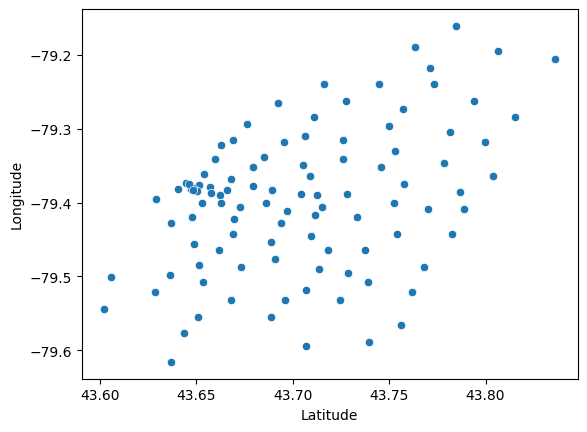

In [218]:
location_df = pd.read_csv(r"C:\Users\rahul\Desktop\MBAN\DBMS\Geospatial_Coordinates.csv")
sns.scatterplot(data = location_df, x = "Latitude", y = "Longitude")
location_df.head(2)

In [241]:
polygon_points = [
    (43.1293, -79.322), (43.1723, -79.7776), (43.3464, -79.8894),
    (43.4925, -79.7153), (43.6838, -79.5584), (43.8743, -79.1002),
    (43.9453, -78.8315), (43.9796, -78.5026), (44.0441, -78.1201),
    (44.0509, -77.8441), (43.9912, -77.8409), (43.6548, -77.8417),
    (43.6361, -77.8418), (43.6311, -78.6903), (43.4504, -79.2006),
    (43.2627, -79.0681), (43.217, -79.0451), (43.1293, -79.322)
]

In [242]:
location_df['InsidePolygon'] = location_df.apply(lambda row: point_inside_polygon(row['Longitude'], row['Latitude'], polygon_points), axis=1)

In [245]:
location_df.head(10)

,Postal Code,Latitude,Longitude,InsidePolygon
0,M1B,43.806686,-79.194353,False
1,M1C,43.784535,-79.160497,False
2,M1E,43.763573,-79.188711,False
3,M1G,43.770992,-79.216917,False
4,M1H,43.773136,-79.239476,False
5,M1J,43.744734,-79.239476,False
6,M1K,43.727929,-79.262029,False
7,M1L,43.711112,-79.284577,False
8,M1M,43.716316,-79.239476,False
9,M1N,43.692657,-79.264848,False


In [247]:
for i in location_df['InsidePolygon']:
    if i == True:
        location_df['Event'] = event
        location_df['Effective'] = effective
        location_df['Expires'] = expires
        location_df['Headline'] = headline
        location_df['Description'] = description
    else:
        location_df['Event'] = "No Alert"
        location_df['Effective'] = "No Alert"
        location_df['Expires'] = "No Alert"
        location_df['Headline'] = "No Alert"
        location_df['Description'] = "No Alert"
        

In [248]:
location_df.head()

,Postal Code,Latitude,Longitude,InsidePolygon,Event,Effective,Expires,Headline,Description
0,M1B,43.806686,-79.194353,False,No Alert,No Alert,No Alert,No Alert,No Alert
1,M1C,43.784535,-79.160497,False,No Alert,No Alert,No Alert,No Alert,No Alert
2,M1E,43.763573,-79.188711,False,No Alert,No Alert,No Alert,No Alert,No Alert
3,M1G,43.770992,-79.216917,False,No Alert,No Alert,No Alert,No Alert,No Alert
4,M1H,43.773136,-79.239476,False,No Alert,No Alert,No Alert,No Alert,No Alert


In [254]:
dtype_mapping = {  
    'Postal Code': sa.types.VARCHAR(15),  
    'Latitude': sa.types.FLOAT,
    'Longitude': sa.types.FLOAT,
    'Event': sa.types.VARCHAR(50),
    'Effective': sa.types.VARCHAR(50),
    'Expires': sa.types.VARCHAR(50),
    'Headline': sa.types.VARCHAR(50),
    'Description': sa.types.VARCHAR(100)  
}

location_df.to_sql(
    name='weather_alert',
    schema='uploads',
    con=engine,
    if_exists='replace',
    index=False,
    method='multi',
    dtype=dtype_mapping
)


103